# Fetching + model buildeing

In [1]:
cities = {
    'barcelona':'Barcelona', 
    'madrid':'Madrid'
}

100%|██████████| 2/2 [02:58<00:00, 89.33s/it]


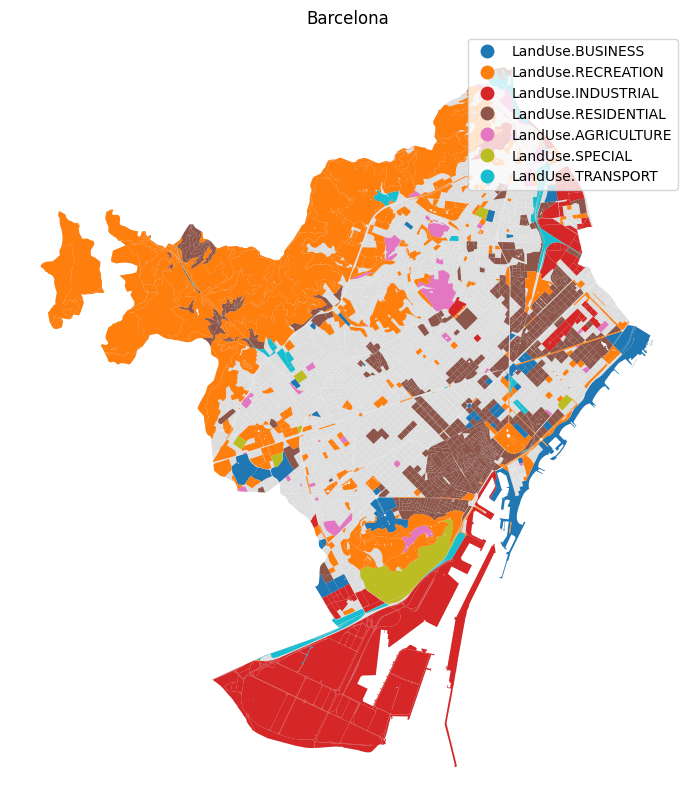

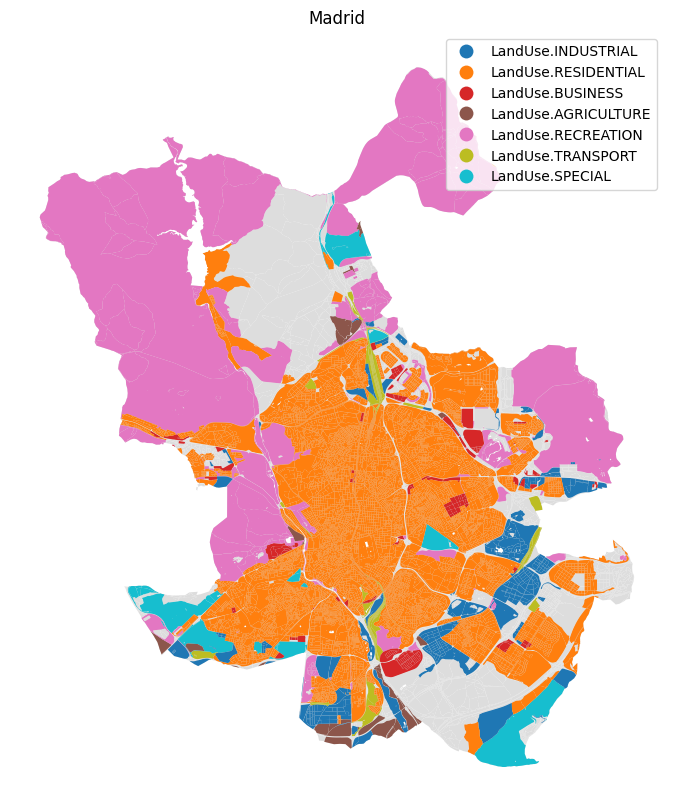

In [ ]:
from common import get_blocks_gdf
from blocksnet.config import log_config
from tqdm import tqdm

log_config.set_logger_level('ERROR')

for file_name, city_name in tqdm(cities.items()):

    blocks_gdf = get_blocks_gdf(city_name)
    
    ax = blocks_gdf.plot(color='#ddd', figsize=(10,10))
    blocks_gdf.plot('land_use', legend=True, ax=ax)
    ax.set_axis_off()
    ax.set_title(city_name)

    blocks_gdf.to_pickle(f'./../data/{file_name}.pickle')